# Generating team and salaries data

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import linregress
import seaborn as sns
import numpy as np
import sklearn
import scipy.stats as stats


In [2]:
#Teams data import

teams_df = pd.read_csv("Baseball Dataset\Teams.csv")
                          
teams_df.head()

#Limiting data to years 1985 - 2015
teams_df = teams_df[teams_df['yearID']>=1985].reset_index(drop=True)

teams_df.head()

teams_df.groupby('franchID').count()

#Limiting to franchise in full sample
    #Note: The Arizona Diamondbacks, Colorado Rockies, Flordia Marlins, and Tampa Bay Devils franchises 
    #did not exist during the full study time perion (1985-2015) and are dropped from the dataset

excluded_franchID = ['ARI','COL','FLA','TBD']

teams_df = teams_df.loc[~teams_df['franchID'].isin(excluded_franchID)]

teams_df.groupby('franchID').count()


,yearID,lgID,teamID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
franchID,,,,,,,,,,,,,,,,,,,,,
ANA,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
ATL,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
BAL,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
BOS,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CHC,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CHW,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CIN,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CLE,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
DET,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31


In [3]:
#Salaries data import

salaries_df = pd.read_csv("Baseball Dataset\Salaries.csv")
                          
salaries_df.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
#Team player salaries summary statistics
team_salary_stats = salaries_df.groupby(['yearID','teamID']).agg(total_player_salaries = ('salary', 'sum'),
                                                                  med_player_salary = ('salary','median'),
                                                                  min_player_salary = ('salary','min'),
                                                                  max_player_salary = ('salary','max'),
                                                                  salary_var = ('salary','var'))

team_salary_stats.head()

total_player_salaries  med_player_salary  min_player_salary  \
yearID teamID                                                                
1985   ATL                  14807000           620833.5             120000   
       BAL                  11560712           497916.5              60000   
       BOS                  10897560           325000.0             115000   
       CAL                  14427894           493750.0              60000   
       CHA                   9846178           333333.0              60000   

               max_player_salary    salary_var  
yearID teamID                                   
1985   ATL               1625000  1.576369e+11  
       BAL               1472819  1.017152e+11  
       BOS               1075000  8.910658e+10  
       CAL               1100000  9.319582e+10  
       CHA               1242333  1.184021e+11

In [5]:
#Checking # of teams per year
team_salary_stats.groupby('yearID').nunique()

#Consider restricting our sample to original 26 teams


,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var
yearID,,,,,
1985,26,24,10,23,26
1986,26,25,1,24,26
1987,26,26,2,25,26
1988,26,25,4,23,26
1989,26,26,2,25,26
1990,26,23,1,21,26
1991,26,24,6,24,26
1992,26,24,3,25,26
1993,28,25,3,25,28


In [6]:
#Merging Team and Salary Data
team_salary_df = pd.merge(teams_df, team_salary_stats, on = ('yearID','teamID'))

team_salary_df.head() 

# Export the merged data into a csv
team_salary_df.to_csv("Output/team_salary_merged.csv", index=False)
    

In [7]:
#Adding CBT thresholds and flags for 2003-2015

thresholds = pd.read_csv("Salary Thresholds/2003-2015 Salary Thresholds.csv", thousands=',')

team_salary_2003_2015 = pd.merge(team_salary_df,thresholds, left_on='yearID', right_on='Year')

team_salary_2003_2015['over_threshold'] =np.where(team_salary_2003_2015['total_player_salaries']>team_salary_2003_2015['Threshold'], 1,0)

team_salary_2003_2015['times_over_threshold'] = team_salary_2003_2015.groupby('franchID')['over_threshold'].cumsum()

team_salary_2003_2015.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Year,Threshold,over_threshold,times_over_threshold
0,2003,AL,ANA,ANA,W,3,162,82.0,77,85,...,ANA,79031667,1000000.0,300000,11500000,1.199027e+13,2003,117000000,0,0
1,2003,NL,ATL,ATL,E,1,162,81.0,101,61,...,ATL,106243667,800000.0,300000,14750000,2.563566e+13,2003,117000000,0,0
2,2003,AL,BAL,BAL,E,4,163,81.0,71,91,...,BAL,73877500,1200000.0,300000,13000000,8.226029e+12,2003,117000000,0,0
3,2003,AL,BOS,BOS,E,2,162,81.0,95,67,...,BOS,99946500,2000000.0,300000,20000000,2.294345e+13,2003,117000000,0,0
4,2003,AL,CHA,CHW,C,2,162,81.0,86,76,...,CHA,51010000,475000.0,300000,9000000,7.170776e+12,2003,117000000,0,0


In [8]:
#Dataset info
team_salary_2003_2015.info() 

team_salary_2003_2015.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yearID                 338 non-null    int64  
 1   lgID                   338 non-null    object 
 2   teamID                 338 non-null    object 
 3   franchID               338 non-null    object 
 4   divID                  338 non-null    object 
 5   Rank                   338 non-null    int64  
 6   G                      338 non-null    int64  
 7   Ghome                  338 non-null    float64
 8   W                      338 non-null    int64  
 9   L                      338 non-null    int64  
 10  DivWin                 338 non-null    object 
 11  WCWin                  338 non-null    object 
 12  LgWin                  338 non-null    object 
 13  WSWin                  338 non-null    object 
 14  R                      338 non-null    int64  
 15  AB    

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,PPF,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Year,Threshold,over_threshold,times_over_threshold
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,...,338.000000,3.380000e+02,3.380000e+02,338.000000,3.380000e+02,3.380000e+02,338.000000,3.380000e+02,338.000000,338.000000
mean,2009.000000,2.946746,161.976331,80.997041,81.594675,80.369822,730.026627,5545.044379,1444.571006,287.979290,...,99.553254,9.359137e+07,1.470698e+06,400949.579882,1.506699e+07,1.943478e+13,2009.000000,1.576154e+08,0.050296,0.322485
std,3.747205,1.464761,0.287270,0.425441,11.138922,11.107082,83.394326,79.324042,84.026222,28.810177,...,4.083528,3.933483e+07,9.980763e+05,73249.943947,5.297352e+06,1.508880e+13,3.747205,2.459180e+07,0.218879,1.550198
min,2003.000000,1.000000,161.000000,78.000000,43.000000,57.000000,513.000000,5294.000000,1199.000000,201.000000,...,88.000000,1.789070e+07,3.135000e+05,300000.000000,3.000000e+06,5.713550e+11,2003.000000,1.170000e+08,0.000000,0.000000
25%,2006.000000,2.000000,162.000000,81.000000,73.000000,72.000000,667.000000,5487.000000,1380.000000,270.000000,...,97.000000,6.710537e+07,7.693750e+05,327000.000000,1.150000e+07,8.701190e+12,2006.000000,1.365000e+08,0.000000,0.000000
50%,2009.000000,3.000000,162.000000,81.000000,83.000000,79.000000,724.500000,5543.000000,1443.000000,285.500000,...,100.000000,8.770905e+07,1.197500e+06,400000.000000,1.433866e+07,1.551779e+13,2009.000000,1.620000e+08,0.000000,0.000000
75%,2012.000000,4.000000,162.000000,81.000000,90.000000,89.000000,787.000000,5602.750000,1506.750000,304.750000,...,102.000000,1.123440e+08,2.000000e+06,480000.000000,1.867696e+07,2.397793e+13,2012.000000,1.780000e+08,0.000000,0.000000
max,2015.000000,6.000000,163.000000,84.000000,105.000000,119.000000,968.000000,5769.000000,1667.000000,376.000000,...,115.000000,2.319789e+08,5.833334e+06,514000.000000,3.300000e+07,8.588077e+13,2015.000000,1.890000e+08,1.000000,13.000000


In [9]:
rank_by_salary_df = teams_df.copy(deep=True)
rank_by_salary_df["Salary Rank"] = ""
rank_by_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,


In [10]:
# adding a salary difference column
diff_by_salary_df = team_salary_df.copy(deep=True)
diff_by_salary_df["Salary Rank"] = ""
diff_by_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,106,ATL,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,BAL,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,BOS,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,CAL,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,CHW,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,


In [11]:
team_salary_df['Salary Rank'] = team_salary_df.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

team_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,106,ATL,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,1
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,BAL,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,6
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,BOS,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,10
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,CAL,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,2
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,CHW,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,15


In [12]:
#Merging team, salary, and salary rank data

#yearly_team_salaries = yearly_team_salaries.drop(columns='total_player_salaries')

team_salary_df['Salary Rank'] = team_salary_df.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

#Merging salary thresholds for 2003-2015

thresholds = pd.read_csv("Salary Thresholds/2003-2015 Salary Thresholds.csv", thousands=',')

team_salary_tax_df = pd.merge(team_salary_df,thresholds, left_on='yearID', right_on='Year', how='left').drop(columns=["Year"])

team_salary_tax_df['Threshold'].fillna(0,inplace=True)

#Creating Taxed (over_threshold) Flag for all years
top_5_years = [1997,1998,1999,2002]

team_salary_tax_df['over_threshold'] = np.where(np.logical_xor(np.logical_and(team_salary_tax_df['yearID'].isin(top_5_years), team_salary_tax_df['Salary Rank'] <=5),
                                                               np.logical_and(team_salary_tax_df['yearID'] >=2003, team_salary_tax_df['total_player_salaries']>team_salary_tax_df['Threshold'])),
                                                 1,0)
     #for 1997-2002 top 5 spending teams were taxed
     #for 2003-2015 teams were taxed if spent over threshold


team_salary_tax_df.head()



,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank,Threshold,over_threshold
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,1,0.0,0
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,6,0.0,0
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,10,0.0,0
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,2,0.0,0
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,15,0.0,0


In [13]:
#Counting # of times taxed since 1997
team_salary_tax_df['times_over_threshold'] = team_salary_tax_df.groupby('franchID')['over_threshold'].cumsum()

# Export the merged data into a csv
team_salary_tax_df.to_csv("Output/team_salary_tax.csv", index=False)

#Sorting by most to less taxed teams

df_2015 = team_salary_tax_df[team_salary_tax_df['yearID']==2015]
times_taxed = df_2015[['franchID', 'name', 'times_over_threshold']].sort_values('times_over_threshold', ascending=False)

times_taxed



,franchID,name,times_over_threshold
786,NYY,New York Yankees,17
803,LAD,Los Angeles Dodgers,5
787,BAL,Baltimore Orioles,3
788,BOS,Boston Red Sox,3
789,TEX,Texas Rangers,3
782,CLE,Cleveland Indians,2
801,ATL,Atlanta Braves,2
783,CHW,Chicago White Sox,1
799,NYM,New York Mets,1
780,KCR,Kansas City Royals,0


# Question 1 Analysis, salary impacts (Clayton Knight )

In [14]:
# group by year and franchID, and calculate the total player salaries for each group
yearly_team_salaries = team_salary_df.groupby(["yearID", "franchID"])["total_player_salaries"].sum().reset_index()

# Rank the total player salaries within each year
yearly_team_salaries['Salary Rank'] = yearly_team_salaries.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

yearly_team_salaries.head(-30)

yearly_team_salaries[yearly_team_salaries["Salary Rank"]==1]

,yearID,franchID,total_player_salaries,Salary Rank
1,1985,ATL,14807000,1
41,1986,NYY,18494253,1
67,1987,NYY,17099714,1
93,1988,NYY,19441152,1
115,1989,LAD,21071562,1
140,1990,KCR,23361084,1
172,1991,OAK,36999167,1
206,1992,TOR,44788666,1
232,1993,TOR,47279166,1
235,1994,ATL,49383513,1


In [15]:
# Rename the columns
yearly_team_salaries_rename = yearly_team_salaries.rename(columns={'yearID': 'Year', 'franchID': 'Franchise ID', 'total_player_salaries': 'Total Team Salary'})

yearly_team_salaries_rename

,Year,Franchise ID,Total Team Salary,Salary Rank
0,1985,ANA,14427894,2
1,1985,ATL,14807000,1
2,1985,BAL,11560712,6
3,1985,BOS,10897560,10
4,1985,CHC,12702917,4
...,...,...,...,...
801,2015,SFG,164701500,5
802,2015,STL,119241500,10
803,2015,TEX,143742789,7
804,2015,TOR,112992400,15


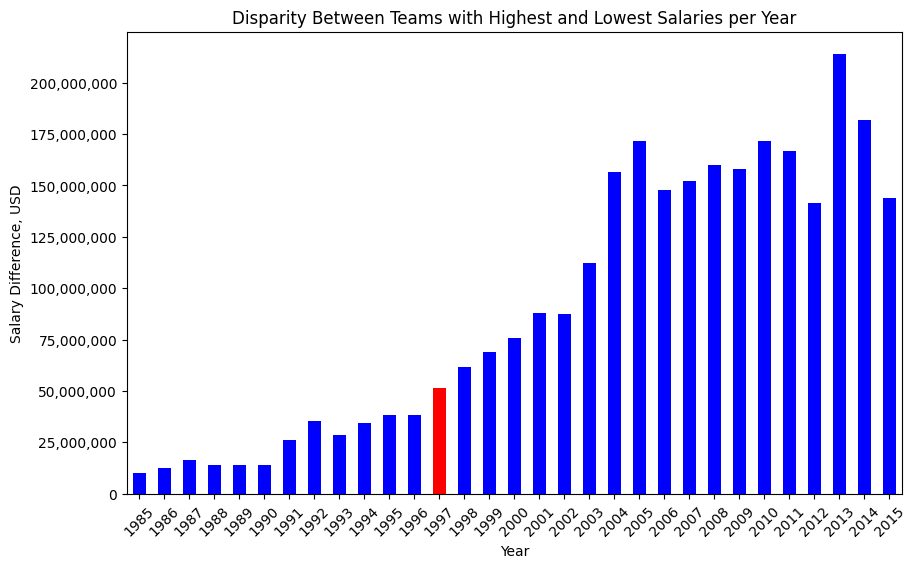

In [16]:
# getting the difference between top and bottom each year
yearly_salary_difference = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].max() - yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].min()

# getting the average salary per year

avg_salary_per_year = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].mean()

# bar chart
plt.figure(figsize=(10,6))
bar_colors=["blue" if year != 1997 else "red" for year in yearly_salary_difference.index]
yearly_salary_difference.plot(kind="bar", color=bar_colors)
plt.title("Disparity Between Teams with Highest and Lowest Salaries per Year")
plt.xlabel("Year")
plt.ylabel("Salary Difference, USD")
plt.xticks(rotation=45)
plt.tight_layout
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("Output/Disparity Fig.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

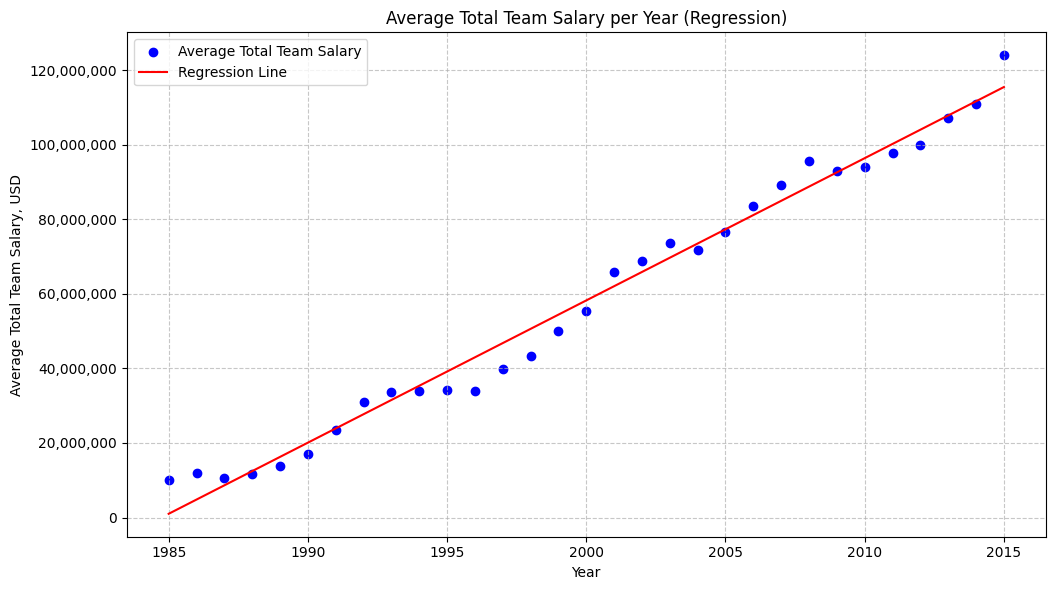

In [17]:
avg_salary_per_year = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].mean().reset_index()

# Linear regression line
slope, intercept,_,_,_ = linregress(avg_salary_per_year["Year"], avg_salary_per_year["Total Team Salary"])
regression_line = slope * avg_salary_per_year["Year"] + intercept

# Plotting the regression chart
plt.figure(figsize=(10, 6))
plt.scatter(avg_salary_per_year["Year"], avg_salary_per_year["Total Team Salary"], color='blue', label="Average Total Team Salary")
plt.plot(avg_salary_per_year["Year"], regression_line, color="red", linestyle="-", label="Regression Line")
plt.title("Average Total Team Salary per Year (Regression)")
plt.xlabel("Year")
plt.ylabel("Average Total Team Salary, USD")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='plain',axis="y")
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("Output/Avg Regression Fig.png")
plt.show

# Question 2 Analysis, wins vs salary ( Wanderson Oliveira)

In [18]:
#Study data files
team_salary_merged_path = "Output/team_salary_merged.csv"
#Read Study Results
team_salary_merged = pd.read_csv(team_salary_merged_path)
team_salary_merged.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,105,106,ATL,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,97,BAL,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,104,BOS,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,100,CAL,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,104,CHW,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11


In [19]:
# Most wins from higher to lower
top_wins = team_salary_merged.sort_values(["W"],ascending=False)
top_wins.head(30)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var
437,2001,AL,SEA,SEA,W,1,162,81.0,116,46,...,94,93,SEA,SEA,SEA,74720834,1925000.0,202500,7000000,4.933991e+12
353,1998,AL,NYA,NYY,E,1,162,81.0,114,48,...,97,95,NYY,NYA,NYA,66806867,970833.5,170000,8300000,4.949012e+12
42,1986,NL,NYN,NYM,E,1,162,81.0,108,54,...,98,96,NYM,NYN,NYN,15393714,255000.0,60000,2800000,4.589444e+11
339,1998,NL,ATL,ATL,E,1,162,81.0,106,56,...,100,98,ATL,ATL,ATL,61186000,297500.0,170000,9600000,7.692754e+12
517,2004,NL,SLN,STL,C,1,162,81.0,105,57,...,100,99,STL,SLN,SLN,83228333,1100000.0,300000,12500000,1.348806e+13
208,1993,NL,ATL,ATL,W,1,162,81.0,104,58,...,101,100,ATL,ATL,ATL,41641417,725000.0,109000,5875000,2.128835e+12
95,1988,AL,OAK,OAK,W,1,162,81.0,104,58,...,97,96,OAK,OAK,OAK,9690000,325000.0,62500,1300000,1.152289e+11
459,2002,AL,OAK,OAK,W,1,162,81.0,103,59,...,98,97,OAK,OAK,OAK,40004167,812500.0,202000,7166667,3.340018e+12
457,2002,AL,NYA,NYY,E,1,161,80.0,103,58,...,100,99,NYY,NYA,NYA,125928583,2500000.0,210000,14600000,1.982178e+13
365,1999,NL,ATL,ATL,E,1,162,81.0,103,59,...,100,98,ATL,ATL,ATL,73140000,1000000.0,200000,10600000,8.813876e+12


In [20]:
#Wins selected by year ( All teams)
top_wins_group = top_wins.groupby("yearID").apply(lambda x: x.sort_values('W',ascending=False))

top_wins_group.head()

yearID lgID teamID franchID divID  Rank    G  Ghome    W   L  ...  \
yearID                                                                   ...   
1985   23    1985   NL    SLN      STL     E     1  162   81.0  101  61  ...   
       25    1985   AL    TOR      TOR     E     1  161   80.0   99  62  ...   
       16    1985   NL    NYN      NYM     E     2  162   81.0   98  64  ...   
       15    1985   AL    NYA      NYY     E     2  161   80.0   97  64  ...   
       11    1985   NL    LAN      LAD     W     1  162   81.0   95  67  ...   

           BPF  PPF teamIDBR teamIDlahman45  teamIDretro  \
yearID                                                     
1985   23  100   99      STL            SLN          SLN   
       25  104  103      TOR            TOR          TOR   
       16   99   97      NYM            NYN          NYN   
       15   98   97      NYY            NYA          NYA   
       11   97   96      LAD            LAN          LAN   

           total_player_salaries  med_player_salary  min_player_salary  \
yearID                                                                   
1985   23               11817083           457500.0              60000   
       25                8812550           353150.0              60000   
       16               10834762           325000.0              60000   
       15               14238204           618750.0             100000   
       11               10967917           435000.0              60000   

           max_player_salary    salary_var  
yearID                                      
1985   23            1555000  1.675319e+11  
       25            1000000  7.582151e+10  
       16            2028571  2.973267e+11  
       15            1795704  1.956184e+11  
       11            1270000  1.073127e+11  

[5 rows x 53 columns]

In [21]:
# Team with most victories by year 
dataframe = top_wins_group.drop_duplicates(subset=['yearID'])
dataframe

,,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var
yearID,,,,,,,,,,,,,,,,,,,,,,
1985,23,1985,NL,SLN,STL,E,1,162,81.0,101,61,...,100,99,STL,SLN,SLN,11817083,457500.0,60000,1555000,1.675319e+11
1986,42,1986,NL,NYN,NYM,E,1,162,81.0,108,54,...,98,96,NYM,NYN,NYN,15393714,255000.0,60000,2800000,4.589444e+11
1987,60,1987,AL,DET,DET,E,1,162,81.0,98,64,...,96,95,DET,DET,DET,12122881,420000.0,62500,1850000,1.936324e+11
1988,95,1988,AL,OAK,OAK,W,1,162,81.0,104,58,...,97,96,OAK,OAK,OAK,9690000,325000.0,62500,1300000,1.152289e+11
1989,121,1989,AL,OAK,OAK,W,1,162,81.0,99,63,...,97,95,OAK,OAK,OAK,15613070,572500.0,68000,1600000,2.153701e+11
1990,147,1990,AL,OAK,OAK,W,1,162,81.0,103,59,...,96,95,OAK,OAK,OAK,19887501,405000.0,100000,2350000,3.352870e+11
1991,175,1991,NL,PIT,PIT,E,1,162,84.0,98,64,...,99,98,PIT,PIT,PIT,23634667,600000.0,105000,3350000,7.479406e+11
1992,182,1992,NL,ATL,ATL,W,1,162,81.0,98,64,...,107,105,ATL,ATL,ATL,34625333,600000.0,109000,3183333,1.035898e+12
1993,208,1993,NL,ATL,ATL,W,1,162,81.0,104,58,...,101,100,ATL,ATL,ATL,41641417,725000.0,109000,5875000,2.128835e+12


In [22]:
not_strike= dataframe.copy(deep=True)
not_strike = not_strike[not_strike['yearID']!=1994]
not_strike['log_salary'] = np.log(not_strike['total_player_salaries'])
not_strike.head(30)

,,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,log_salary
yearID,,,,,,,,,,,,,,,,,,,,,,
1985,23,1985,NL,SLN,STL,E,1,162,81.0,101,61,...,99,STL,SLN,SLN,11817083,457500.0,60000,1555000,1.675319e+11,16.285057
1986,42,1986,NL,NYN,NYM,E,1,162,81.0,108,54,...,96,NYM,NYN,NYN,15393714,255000.0,60000,2800000,4.589444e+11,16.549470
1987,60,1987,AL,DET,DET,E,1,162,81.0,98,64,...,95,DET,DET,DET,12122881,420000.0,62500,1850000,1.936324e+11,16.310605
1988,95,1988,AL,OAK,OAK,W,1,162,81.0,104,58,...,96,OAK,OAK,OAK,9690000,325000.0,62500,1300000,1.152289e+11,16.086605
1989,121,1989,AL,OAK,OAK,W,1,162,81.0,99,63,...,95,OAK,OAK,OAK,15613070,572500.0,68000,1600000,2.153701e+11,16.563619
1990,147,1990,AL,OAK,OAK,W,1,162,81.0,103,59,...,95,OAK,OAK,OAK,19887501,405000.0,100000,2350000,3.352870e+11,16.805602
1991,175,1991,NL,PIT,PIT,E,1,162,84.0,98,64,...,98,PIT,PIT,PIT,23634667,600000.0,105000,3350000,7.479406e+11,16.978225
1992,182,1992,NL,ATL,ATL,W,1,162,81.0,98,64,...,105,ATL,ATL,ATL,34625333,600000.0,109000,3183333,1.035898e+12,17.360096
1993,208,1993,NL,ATL,ATL,W,1,162,81.0,104,58,...,100,ATL,ATL,ATL,41641417,725000.0,109000,5875000,2.128835e+12,17.544606


In [23]:
# Calculating Mean of Wins per each team 
summary_aggr =  team_salary_merged.groupby(['franchID'])[['W']].agg(['mean'])
summary_aggr

,W
,mean
franchID,
ANA,83.129032
ATL,85.709677
BAL,75.677419
BOS,85.612903
CHC,76.838710
CHW,81.000000
CIN,79.935484
CLE,79.677419


In [24]:
#Correlation between wins and Salary over the years
print(not_strike['W'].corr(not_strike['total_player_salaries']))

-0.12754518595492875


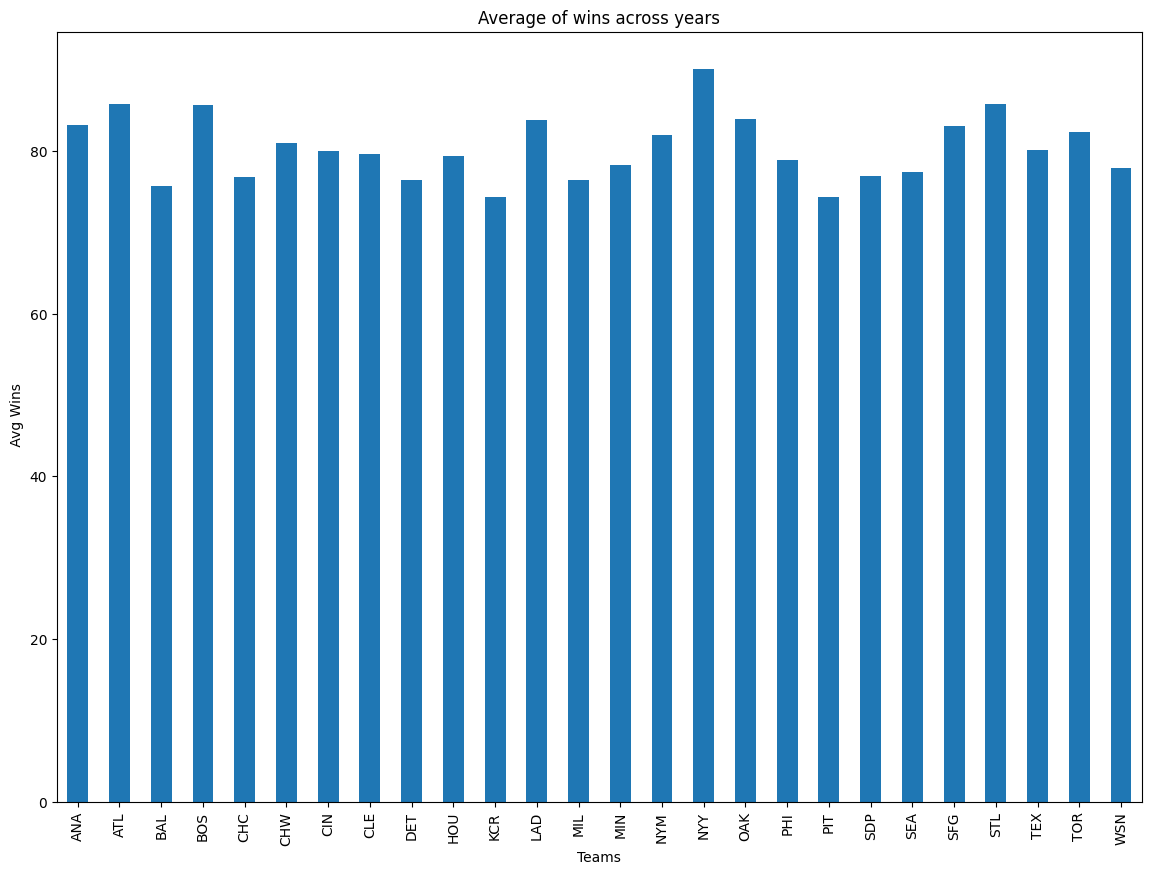

In [25]:
# Average of wins over the years.
plt.figure(figsize=(14,10))  ## width, height
team_salary_merged.groupby('franchID')['W'].mean().plot.bar()
plt.xlabel('Teams')
plt.ylabel(' Avg Wins')
plt.title('Average of wins across years')
plt.savefig('Output/team_avg_wins.png')
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [26]:
# Assigning names to columns in DF
not_strike_renamed = not_strike.rename(columns={
    'franchID': 'Teams',
    'total_player_salaries': 'Salary, USD',
    'yearID': 'Years',
    'W': 'Wins'
})

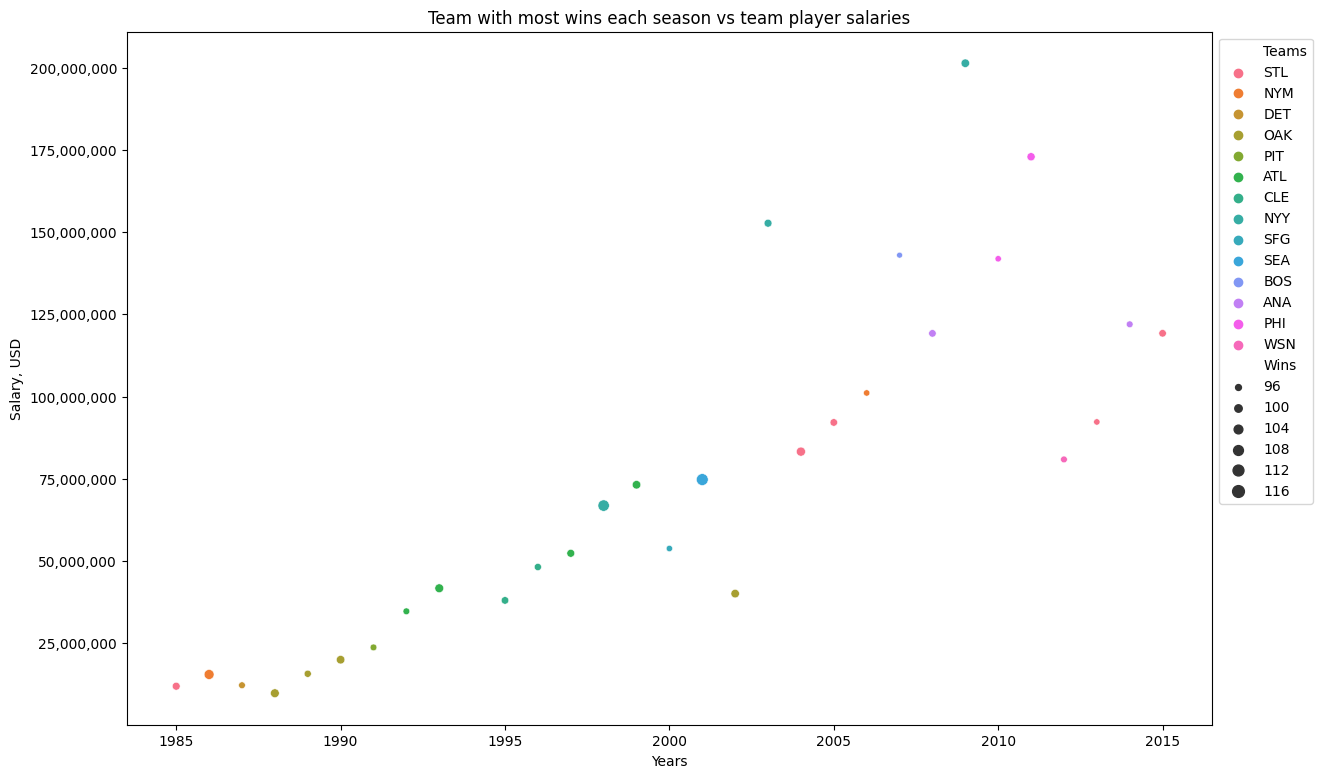

In [27]:
# Correlation between Wins x Salary from 1985 to 2015
plt.figure(figsize=(14, 9))  ## width, height
sns.scatterplot(x='Years', y='Salary, USD', data=not_strike_renamed, size='Wins', hue='Teams')
plt.xlabel('Years')
plt.ylabel('Salary, USD')
plt.title('Team with most wins each season vs team player salaries')
plt.legend(bbox_to_anchor=(1.0, 1.0))
# Formatting y-axis labels to display salary in USD format
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('Output\wins vs salary.png')
plt.show()

# Ouestion 3 Analysis, team performance (Molly Ingram)

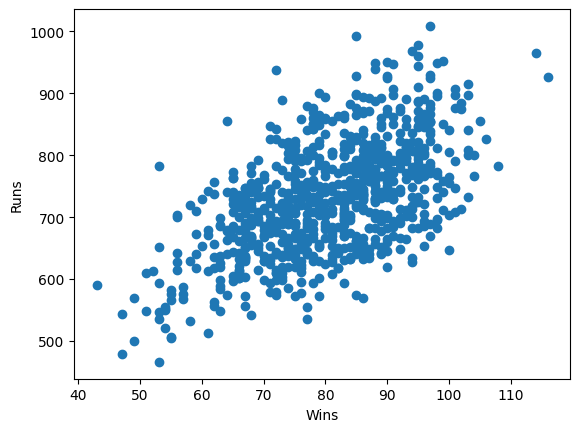

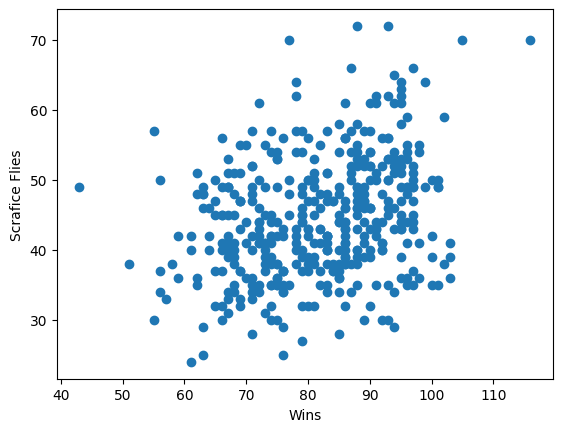

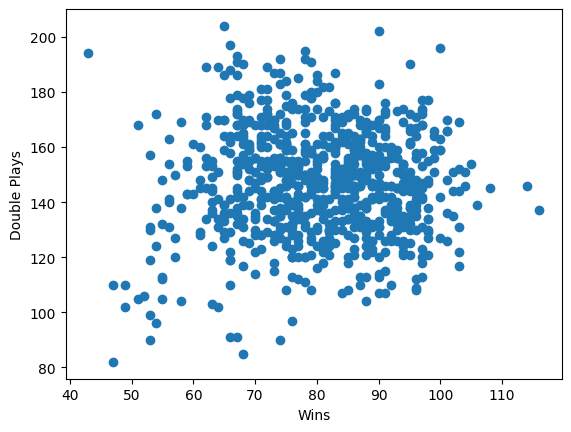

In [28]:
# Relationship btwn performance stats and wins
team_salary_tax = team_salary_tax_df

plt.scatter(team_salary_tax['W'],team_salary_tax['R'])
plt.xlabel('Wins')
plt.ylabel('Runs')
plt.show()

plt.scatter(team_salary_tax['W'],team_salary_tax['SF'])
plt.xlabel('Wins')
plt.ylabel('Scrafice Flies')
plt.show()

plt.scatter(team_salary_tax['W'],team_salary_tax['DP'])
plt.xlabel('Wins')
plt.ylabel('Double Plays')
plt.show()

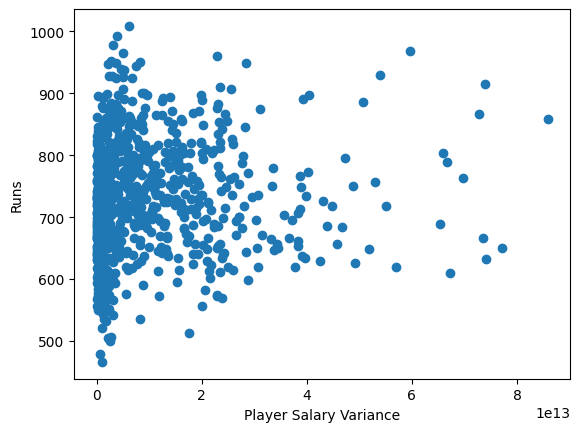

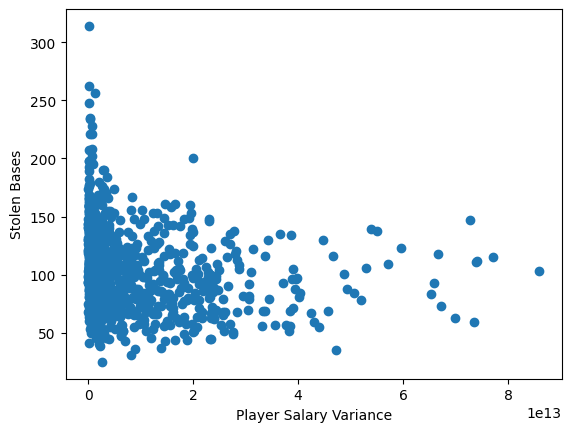

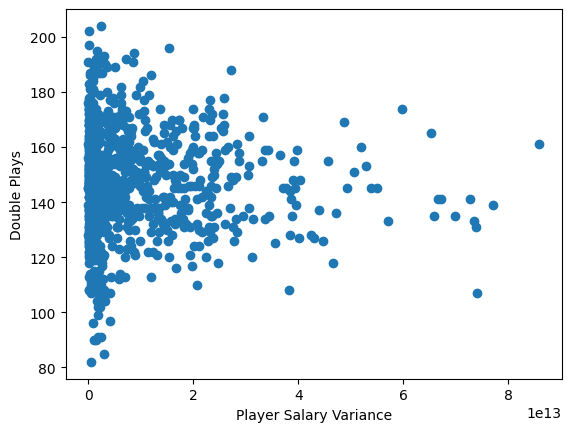

In [29]:
#Relationship btwn performance stats and team salary variance
plt.scatter(team_salary_tax['salary_var'],team_salary_tax['R'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Runs')
plt.show()

plt.scatter(team_salary_tax['salary_var'],team_salary_tax['SB'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Stolen Bases')
plt.show()

plt.scatter(team_salary_tax['salary_var'],team_salary_tax['DP'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Double Plays')
plt.show()


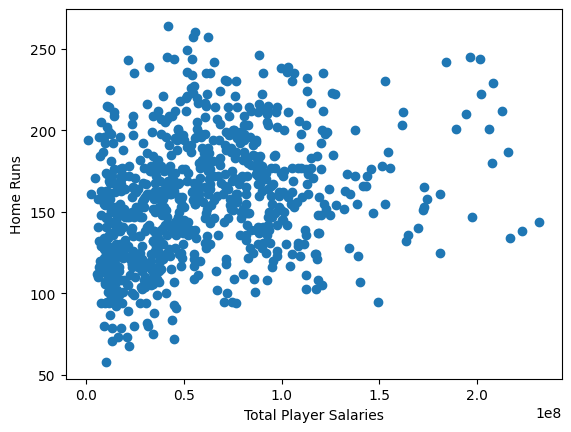

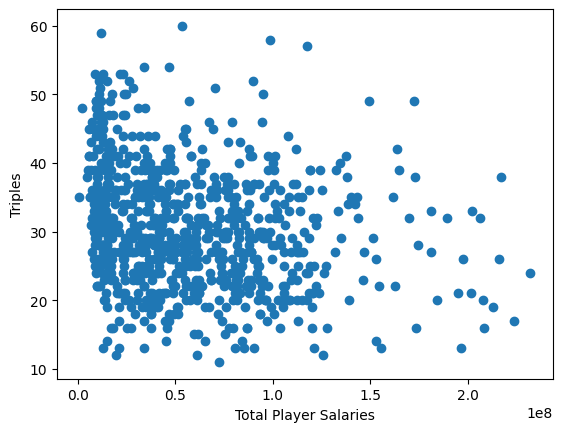

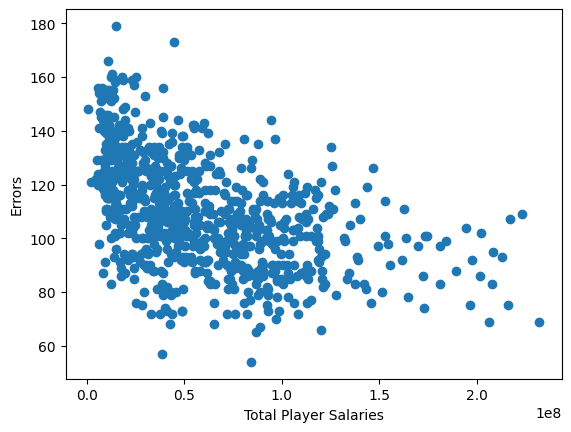

In [30]:
#Relationship btwn performance stats and team salary 
plt.scatter(team_salary_tax['total_player_salaries'],team_salary_tax['HR'])
plt.xlabel('Total Player Salaries')
plt.ylabel('Home Runs')
plt.show()

plt.scatter(team_salary_tax['total_player_salaries'],team_salary_tax['3B'])
plt.xlabel('Total Player Salaries')
plt.ylabel('Triples')
plt.show()

plt.scatter(team_salary_tax['total_player_salaries'],team_salary_tax['E'])
plt.xlabel('Total Player Salaries')
plt.ylabel('Errors')
plt.show()

In [31]:
team_salary_tax.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'total_player_salaries',
       'med_player_salary', 'min_player_salary', 'max_player_salary',
       'salary_var', 'Salary Rank', 'Threshold', 'over_threshold',
       'times_over_threshold'],
      dtype='object')

### Using RandomForest Regressor to find which performance variables best relate to wins and team player salaries

In [33]:
# Pulling out feature and target variables

rf_df = team_salary_tax[['W','R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS',
                         'RA', 'ER', 'ERA', 'CG','SHO','SV', 'HA', 'HRA', 'BBA',
                           'SOA', 'E', 'DP', 'FP','total_player_salaries']]


rf_df.isnull().sum()

W                        0
R                        0
AB                       0
H                        0
2B                       0
3B                       0
HR                       0
BB                       0
SO                       0
SB                       0
CS                       0
RA                       0
ER                       0
ERA                      0
CG                       0
SHO                      0
SV                       0
HA                       0
HRA                      0
BBA                      0
SOA                      0
E                        0
DP                       0
FP                       0
total_player_salaries    0
dtype: int64

In [35]:
# Generating training and test samples

x = rf_df.drop(columns=['W', 'total_player_salaries'])
y_wins = rf_df['W']
y_salary = rf_df['total_player_salaries']

from sklearn.model_selection import train_test_split

training_w, testing_w, training_labels_w, testings_labels_w = train_test_split(x, y_wins,test_size = .5, random_state = 42)
training_s, testing_s, training_labels_s, testings_labels_s = train_test_split(x, y_salary,test_size = .5, random_state = 42)

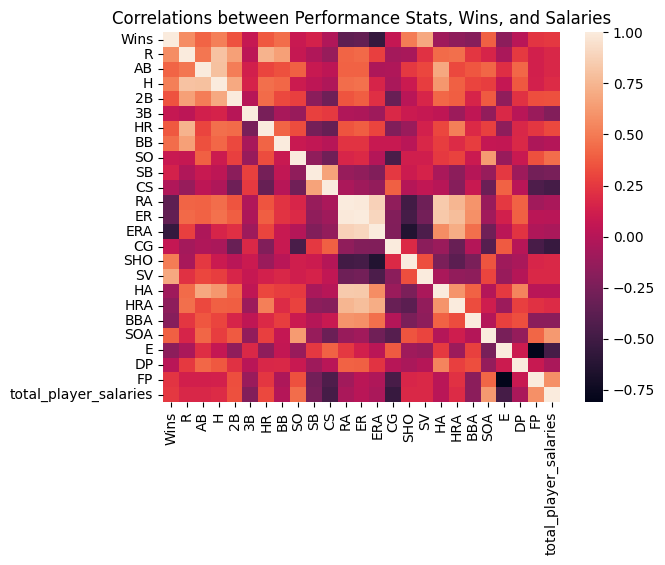

In [36]:
#Looking at relationships btwn vars
rf_df = rf_df.rename(columns={'total_player_salaries_100k': 'Player Salaries', 'W': "Wins"})

sns.heatmap(rf_df.corr(),xticklabels=rf_df.columns, yticklabels=rf_df.columns)
plt.title('Correlations between Performance Stats, Wins, and Salaries')

plt.savefig('Output/performance correlations.png')


In [37]:
#Running RF for wins and salary outcomes

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf_w = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_s = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf_w.fit(training_w, training_labels_w)
rf_s.fit(training_s, training_labels_s)

#Checking performance 
predictions_w = rf_w.predict(testing_w)
error_w = abs(predictions_w - testings_labels_w)
mape_w = 100 * (error_w / testings_labels_w)
accuracy_w = 100 - np.mean(mape_w)
print('Accuracy in estimating wins:', round(accuracy_w, 2), '%.')

predictions_s = rf_s.predict(testing_s)
error_s = abs(predictions_s - testings_labels_s)
mape_s = 100 * (error_s / testings_labels_s)
accuracy_s = 100 - np.mean(mape_s)
print('Accuracy in estimating salary:', round(accuracy_s, 2), '%.')


Accuracy in estimating wins: 95.37 %.
Accuracy in estimating salary: 36.95 %.


In [38]:
#Feature importance
importances_w = list(rf_w.feature_importances_)
feature_importances_w = [(feature, round(importance, 3)) for feature, importance in zip(x.columns, importances_w)]
# Sort the feature importances by most important first
feature_importances_w = sorted(feature_importances_w, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Variable importance for predicting wins')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_w]

print('-----------------------------------------------------------------------------------')

importances_s = list(rf_s.feature_importances_)
feature_importances_s = [(feature, round(importance, 3)) for feature, importance in zip(x.columns, importances_s)]
# Sort the feature importances by most important first
feature_importances_s = sorted(feature_importances_s, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Variable importance for predicting salary')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_s]


Variable importance for predicting wins
Variable: SV                   Importance: 0.473
Variable: R                    Importance: 0.198
Variable: ERA                  Importance: 0.084
Variable: RA                   Importance: 0.055
Variable: H                    Importance: 0.021
Variable: ER                   Importance: 0.019
Variable: BBA                  Importance: 0.019
Variable: BB                   Importance: 0.016
Variable: HA                   Importance: 0.016
Variable: SOA                  Importance: 0.013
Variable: HR                   Importance: 0.011
Variable: SHO                  Importance: 0.011
Variable: AB                   Importance: 0.01
Variable: 2B                   Importance: 0.008
Variable: 3B                   Importance: 0.006
Variable: SB                   Importance: 0.006
Variable: CG                   Importance: 0.006
Variable: HRA                  Importance: 0.006
Variable: E                    Importance: 0.006
Variable: SO                  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [39]:
#Adding performance index to main df

team_salary_tax['rf_pred'] = rf_w.predict(x)

team_salary_tax.head()

team_salary_tax['W'].corr(team_salary_tax['rf_pred'])

0.9605599394364223

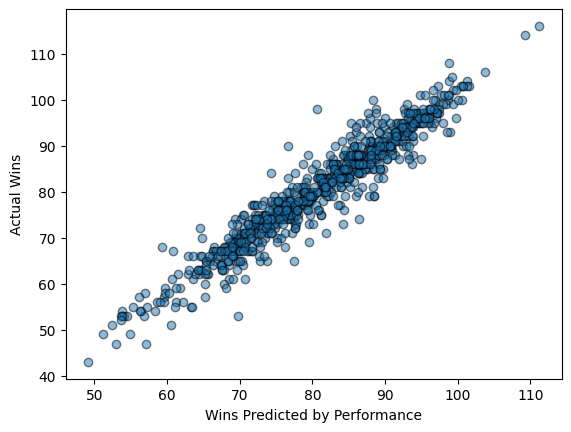

In [40]:
#Performance prediction vs wins
plt.scatter(team_salary_tax['rf_pred'], team_salary_tax['W'], alpha=.5, edgecolors='black')
plt.xlabel('Wins Predicted by Performance')
plt.ylabel('Actual Wins')

plt.savefig('Output/perdicted vs actual.png')


F test results for pre and post F_onewayResult(statistic=array([19.24913227]), pvalue=array([1.30000157e-05]))
F test results for pre and post 2003 F_onewayResult(statistic=array([14.92832029]), pvalue=array([0.0001229]))
Right tailed T test results for pre and post TtestResult(statistic=array([4.38738331]), pvalue=array([6.50000785e-06]), df=array([804.]))
Right tailed T test results for pre and post 2003 TtestResult(statistic=array([3.86371845]), pvalue=array([6.14519827e-05]), df=array([648.]))


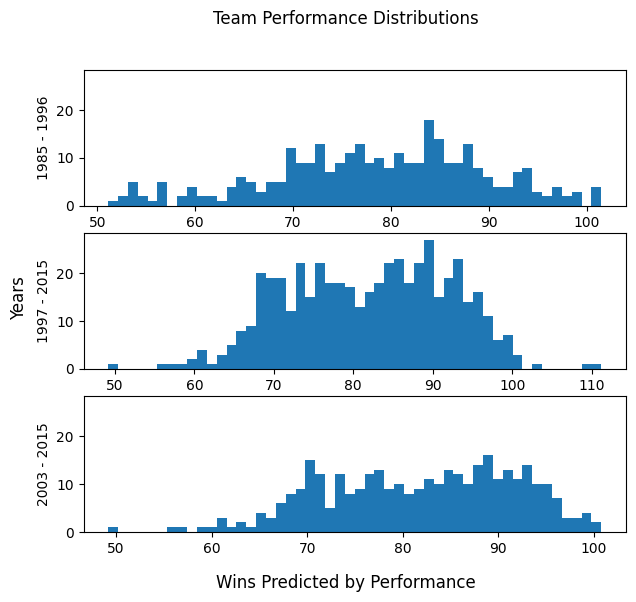

In [43]:
# Statistical tests on performance distributions pre- and post- tax rules

perf_pre = team_salary_tax.loc[team_salary_tax['yearID']<1997, ['rf_pred']]
perf_post = team_salary_tax.loc[team_salary_tax['yearID']>=1997, ['rf_pred']]
perf_post2003 = team_salary_tax.loc[team_salary_tax['yearID']>=2003, ['rf_pred']]

#Testing variances
print('F test results for pre and post', stats.f_oneway(perf_pre,perf_post))
print('F test results for pre and post 2003', stats.f_oneway(perf_pre,perf_post2003))

#Testing means (speficially if post is higher)
print('Right tailed T test results for pre and post', stats.ttest_ind(perf_post, perf_pre, alternative='greater'))
print('Right tailed T test results for pre and post 2003', stats.ttest_ind(perf_post2003, perf_pre, alternative='greater'))


fig, (ax1,ax2,ax3) = plt.subplots(3, sharey=True, figsize=(7,6))
ax1.hist(perf_pre,bins=50)
ax1.set_ylabel('1985 - 1996')
ax2.hist(perf_post,bins=50)
ax2.set_ylabel('1997 - 2015')
ax3.hist(perf_post2003, bins=50)
ax3.set_ylabel('2003 - 2015')
fig.suptitle('Team Performance Distributions')
fig.supxlabel('Wins Predicted by Performance')
fig.supylabel('Years')

plt.savefig('Output/perf distributions.png')



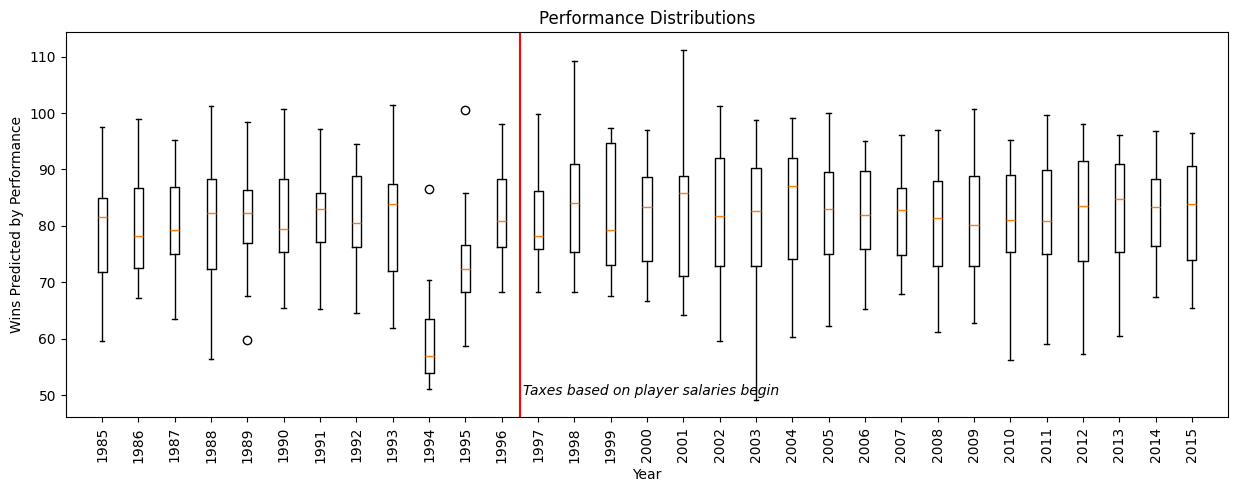

In [44]:
#Generating annual performance predictions
years = team_salary_tax['yearID'].unique()

perf_stats = dict()
for year in years:
    data = team_salary_tax.loc[team_salary_tax['yearID']==year, ['rf_pred']]
    perf_stats[year] = data['rf_pred'].values

perf_stats = pd.DataFrame.from_dict(perf_stats)

plt.figure(figsize=(15,5))
plt.boxplot(perf_stats, positions=np.array(np.arange(len(years))*3), widths=.75)
plt.axvline(34.5, color='r' )
plt.annotate('Taxes based on player salaries begin', xy=[34.75, 50],fontstyle = 'italic')
plt.xticks(np.arange(0,len(years)*3,3),years, rotation = 90)
plt.xlim(-3,len(years)*3)
plt.ylabel('Wins Predicted by Performance')
plt.xlabel('Year')
plt.title('Performance Distributions')
plt.savefig('Output/Performance by year.png')

plt.show()
